I am introducing the concepts of understanding and using convolution to my advantage to understand the idea behind the Central Limit Theorm. The question I am trying to solve is at what point does a distribution, convolved with itself become Normal-like. I then go into to discussing the ideas behind trials factor and how to reduce the number of trials. 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

Text(0,0.5,'Percentage')

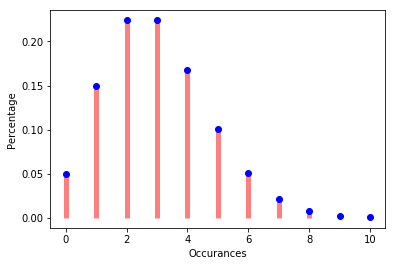

In [5]:
## The noise value per day is averaged at 3 detected rays and this is what the noise looks like
avg_cosmic_background = 3; offset = 0

x = np.linspace(0,10,11)
plt.plot(x, stats.poisson.pmf(x, avg_cosmic_background, offset), 'bo', lw=0)
plt.vlines(x,0, stats.poisson.pmf(x, avg_cosmic_background, offset), colors = 'r', lw=5, alpha=.5 )
plt.xlabel("Occurances")
plt.ylabel("Percentage")

Text(0,0.5,'Percentage')

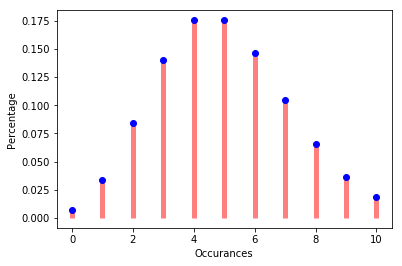

In [6]:
## The actual number of gamma rays for one day is actually 5, this is the plot that represents the actual data
avg_cosmic_background = 3; offset = 0; avg_actual_cosmic = 5;

x = np.linspace(0,10,11)
plt.plot(x, stats.poisson.pmf(x, avg_actual_cosmic, offset), 'bo', lw=0)
plt.vlines(x,0, stats.poisson.pmf(x, avg_actual_cosmic, offset), colors = 'r', lw=5, alpha=.5 )
plt.xlabel("Occurances")
plt.ylabel("Percentage")

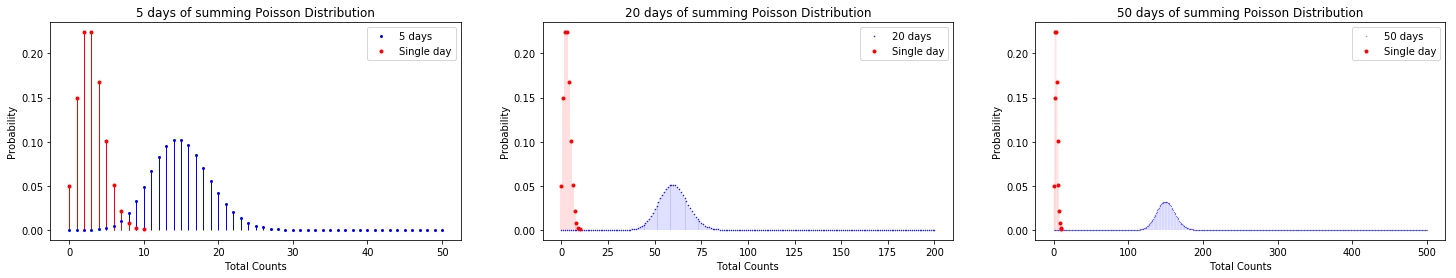

In [8]:
fig, (ax, ax1, ax2) = plt.subplots(1, 3, figsize = (25,4))
err_data = stats.poisson.pmf(x, avg_cosmic_background, offset)
x = np.linspace(0, 10, 11)

days = 5
days_1 = 20
days_2 = 50

y1 = np.convolve(err_data, err_data)
for i in range(2, days):
    y1 = np.convolve(y1, err_data)
    
ax.set_title('5 days of summing Poisson Distribution')
x_new = np.linspace(0, 10*days, 10*days+1)
ax.plot(x_new, y1, 'bo', lw=0, ms=10/days, label = f'{days} days')
ax.plot(x, err_data, 'ro', lw=0, ms=3, label = 'Single day')
ax.vlines(x_new, 0, y1, colors='b', lw=5/days, alpha=1)
ax.vlines(x, 0, err_data, colors='r', lw=5/days, alpha=1)
ax.set_xlabel('Total Counts')
ax.set_ylabel('Probability')
ax.legend()

y2 = np.convolve(err_data, err_data)
for i in range(2, days_1):
    y2 = np.convolve(y2, err_data)
    
ax1.set_title('20 days of summing Poisson Distribution')
x_new = np.linspace(0, 10*days_1, 10*days_1+1)
ax1.plot(x_new, y2, 'bo', lw=0, ms=10/days_1, label = f'{days_1} days')
ax1.plot(x, err_data, 'ro', lw=0, ms=3, label = 'Single day')
ax1.vlines(x_new, 0, y2, colors='b', lw=5/days_1, alpha=1)
ax1.vlines(x, 0, err_data, colors='r', lw=5/days_1, alpha=1)
ax1.set_xlabel('Total Counts')
ax1.set_ylabel('Probability')
ax1.legend()

y3 = np.convolve(err_data, err_data)
for i in range(2, days_2):
    y3 = np.convolve(y3, err_data)
    
ax2.set_title('50 days of summing Poisson Distribution')
x_new = np.linspace(0, 10*days_2, 10*days_2+1)
ax2.plot(x_new, y3, 'bo', lw=0, ms=10/days_2, label = f'{days_2} days')
ax2.plot(x, err_data, 'ro', lw=0, ms=3, label = 'Single day')
ax2.vlines(x_new, 0, y3, colors='b', lw=5/days_2, alpha=1)
ax2.vlines(x, 0, err_data, colors='r', lw=5/days_2, alpha=1)
ax2.set_xlabel('Total Counts')
ax2.set_ylabel('Probability')
ax2.legend()



After 5 days of averaging the poisson distribution, the resulting distribution will still be Poisson because I am now just averaging over more days. This makes sense from a conceptual point of view because if I get an average of 3 signals per day, then over 5 days I should get 15 signals, which is still an average of three. Therefore, the distribution will stay is Poisson. 

Text(0,0.5,'Probability')

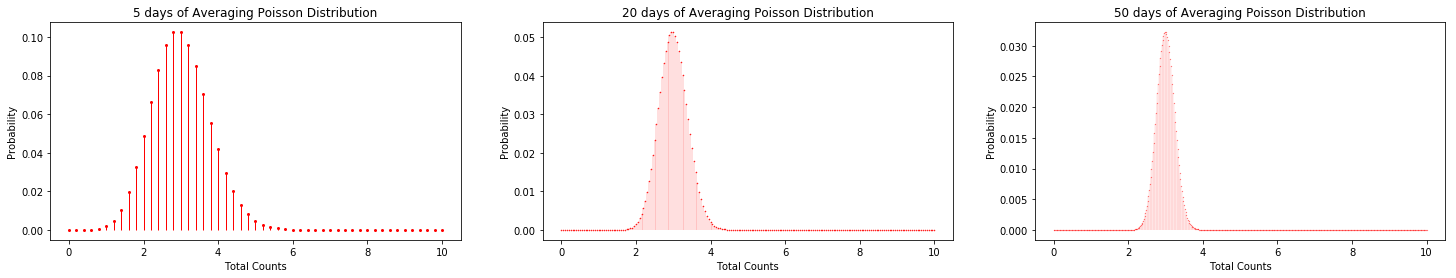

In [9]:
fig, (ax, ax1, ax2) = plt.subplots(1, 3, figsize = (25,4))
err_data = stats.poisson.pmf(x, avg_cosmic_background, offset)
x = np.linspace(0, 10, 11)

days = 5
days_1 = 20
days_2 = 50

y1 = np.convolve(err_data, err_data)
for i in range(2, days):
    y1 = np.convolve(y1, err_data)
    
ax.set_title('5 days of Averaging Poisson Distribution')
x_new = np.linspace(0, 10*days, 10*days+1)/days
ax.plot(x_new, y1, 'ro', lw=0, ms=10/days, label = f'{days} days')
ax.vlines(x_new, 0, y1, colors='r', lw=5/days, alpha=1)
ax.set_xlabel('Total Counts')
ax.set_ylabel('Probability')


y2 = np.convolve(err_data, err_data)
for i in range(2, days_1):
    y2 = np.convolve(y2, err_data)
    
ax1.set_title('20 days of Averaging Poisson Distribution')
x_new = np.linspace(0, 10*days_1, 10*days_1+1)/days_1
ax1.plot(x_new, y2, 'ro', lw=0, ms=10/days_1, label = f'{days_1} days')
ax1.vlines(x_new, 0, y2, colors='r', lw=5/days_1, alpha=1)
ax1.set_xlabel('Total Counts')
ax1.set_ylabel('Probability')


y3 = np.convolve(err_data, err_data)
for i in range(2, days_2):
    y3 = np.convolve(y3, err_data)
    
ax2.set_title('50 days of Averaging Poisson Distribution')
x_new = np.linspace(0, 10*days_2, 10*days_2+1)/days_2
ax2.plot(x_new, y3, 'ro', lw=0, ms=10/days_2, label = f'{days_2} days')
ax2.vlines(x_new, 0, y3, colors='r', lw=5/days_2, alpha=1)
ax2.set_xlabel('Total Counts')
ax2.set_ylabel('Probability')


According to the central limit theorm, as we start to average more convolutions over a longer set of time, this distribution will tend closer to a Gaussian Distribution. We start to see this because as we convolve more days, we start to see a more narrow graph and one that approaches a constant averae rate. 

I am going to find the deviation given a chosen value of background noise collected over 37 days. Each day I will see, on average, 5 gamma rays. I should roughly see 185 gamma rays over the span on the 37 days. I will take this value and apply it to the cdf function and then I will find the deviation using the ppf function after converting to a gaussian distribution 

Percentage of occurances that are flagged as a signal: 5.309774842032766e-11
Sigma value associated with percentage: 6.458


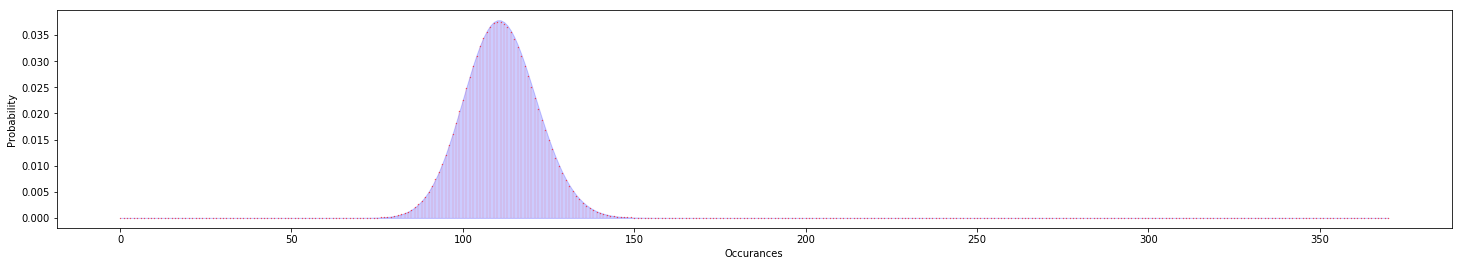

In [10]:
fig, (ax) = plt.subplots(1, 1, figsize = (25,4))
err_data = stats.poisson.pmf(x, avg_cosmic_background, offset)
x = np.linspace(0, 10, 11)

days = 37

y1 = np.convolve(err_data, err_data)
for i in range(2, days):
    y1 = np.convolve(y1, err_data)
    
x_new = np.linspace(0, 10*days, 10*days+1)
ax.plot(x_new, y1, 'ro', lw=0, ms=10/days, label = f'{days} days')
ax.vlines(x_new, 0, y1, colors='r', lw=5/days, alpha=1)
ax.fill_between(x_new, stats.poisson.pmf(x_new, avg_cosmic_background*days, offset), color = 'b', linewidth = 1, alpha = .2)
ax.set_xlabel('Occurances')
ax.set_ylabel('Probability')

prob = 1 - stats.poisson.cdf(5*37, avg_cosmic_background*days, offset)
z_val = stats.norm.ppf(1-(prob))

print(f'Percentage of occurances that are flagged as a signal: {prob}')
print(f'Sigma value associated with percentage: {z_val:.3f}')

After 37 days, the resulting sigma value is around 6.458$\sigma$. This results show that there is a very small probability that any true occurance will be flagged as a signal. 

I will use the Rayleigh Distribution to understand at what point does the convolved data start to look like that of a Normal Distribution

Text(0,0.5,'Probability')

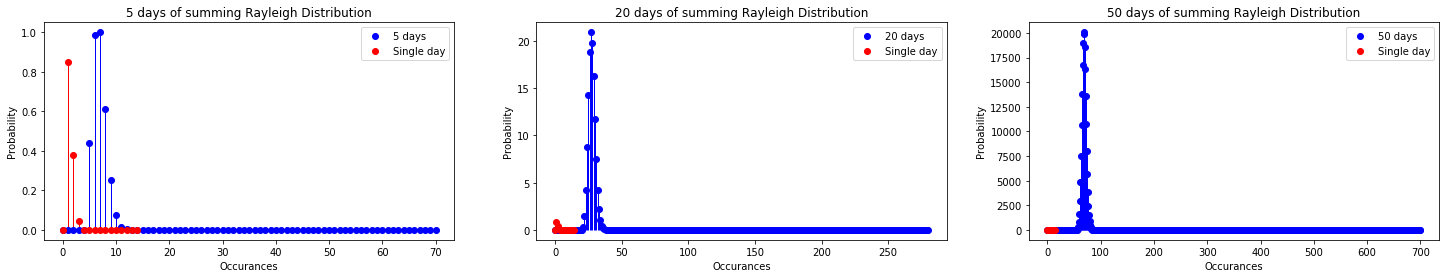

In [24]:
# This is the summation of the Rayleigh distribuion to understand the visual representation
# Of the data

fig, (ax, ax1, ax2) = plt.subplots(1, 3, figsize = (25,4))
x = np.linspace(0, 14, 15)

err_data = 1.4 * stats.rayleigh.pdf(x, loc=0, scale=1)

days = 5
days_1 = 20
days_2 = 50

y1 = np.convolve(err_data, err_data)
for i in range(2, days):
    y1 = np.convolve(y1, err_data)
    
ax.set_title('5 days of summing Rayleigh Distribution')
x_new = np.linspace(0, 14*days, 14*days+1)
ax.plot(x_new, y1, 'bo', lw=2, label = f'{days} days')
ax.plot(x, err_data, 'ro', lw=2, label = 'Single day')
ax.vlines(x_new, 0, y1, colors='b', lw=5/days, alpha=1)
ax.vlines(x, 0, err_data, colors='r', lw=5/days, alpha=1)
ax.legend()
ax.set_xlabel('Occurances')
ax.set_ylabel('Probability')

y2 = np.convolve(err_data, err_data)
for i in range(2, days_1):
    y2 = np.convolve(y2, err_data)
    
ax1.set_title('20 days of summing Rayleigh Distribution')
x_new = np.linspace(0, 14*days_1, 14*days_1+1)
ax1.plot(x_new, y2, 'bo', lw=2, label = f'{days_1} days')
ax1.plot(x, err_data, 'ro', lw=2, label = 'Single day')
ax1.vlines(x_new, 0, y2, colors='b', lw=5/days, alpha=1)
ax1.vlines(x, 0, err_data, colors='r', lw=5/days, alpha=1)
ax1.legend()
ax1.set_xlabel('Occurances')
ax1.set_ylabel('Probability')

y3 = np.convolve(err_data, err_data)
for i in range(2, days_2):
    y3 = np.convolve(y3, err_data)
    
ax2.set_title('50 days of summing Rayleigh Distribution')
x_new = np.linspace(0, 14*days_2, 14*days_2+1)
ax2.plot(x_new, y3, 'bo', lw=2, label = f'{days_2} days')
ax2.plot(x, err_data, 'ro', lw=2, label = 'Single day')
ax2.vlines(x_new, 0, y3, colors='b', lw=5/days, alpha=1)
ax2.vlines(x, 0, err_data, colors='r', lw=5/days, alpha=1)
ax2.legend()
ax2.set_xlabel('Occurances')
ax2.set_ylabel('Probability')



Text(0,0.5,'Log(Probability)')

/Users/mphenicie/Enter/lib/python3.6/site-packages/matplotlib/ticker.py:1097: RuntimeWarning: divide by zero encountered in double_scalars
  coeff = np.round(x / b ** exponent)


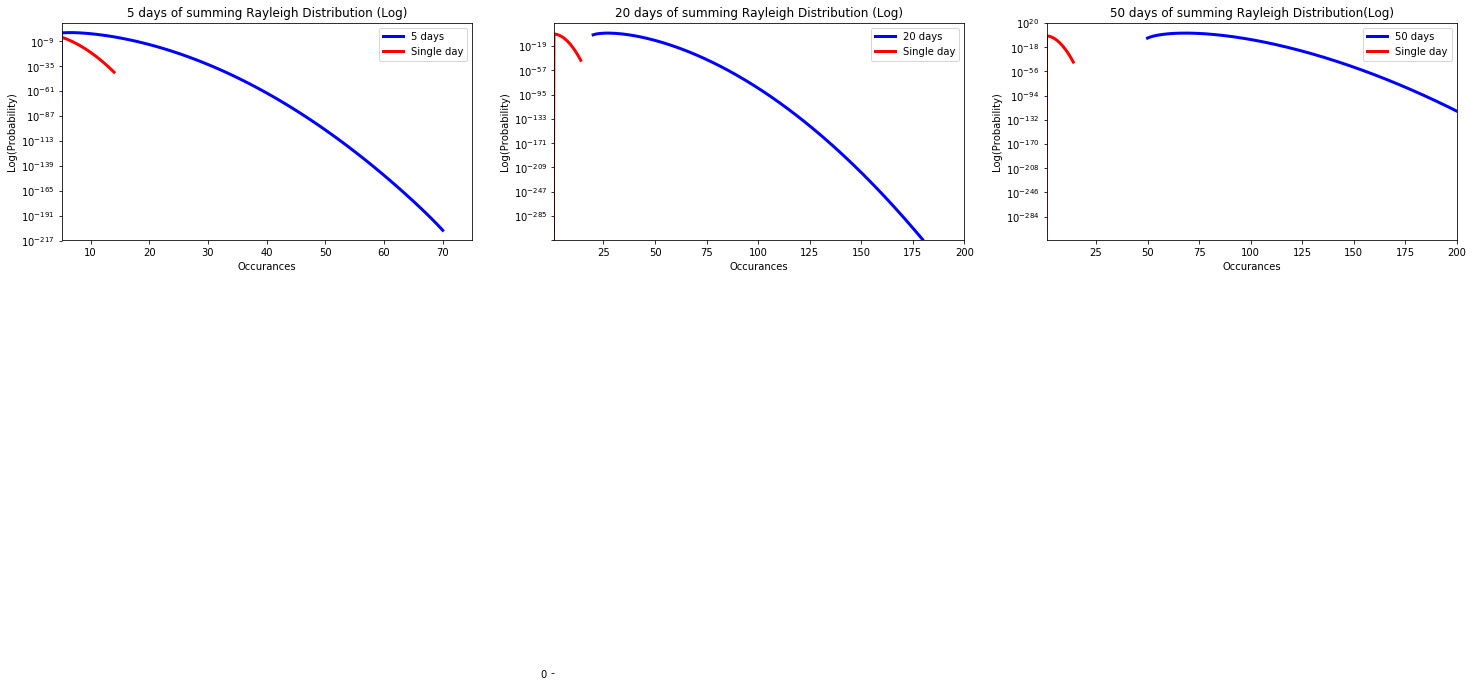

In [25]:
# This is the log of the distribution of each of the summations to understand if it will
# Produce a normal distribution
fig, (ax, ax1, ax2) = plt.subplots(1, 3, figsize = (25,4))
x = np.linspace(0, 14, 15)

err_data = 1.4 * stats.rayleigh.pdf(x, loc=0, scale=1)

days = 5
days_1 = 20
days_2 = 50

y1 = np.convolve(err_data, err_data)
for i in range(2, days):
    y1 = np.convolve(y1, err_data)
    
ax.set_title('5 days of summing Rayleigh Distribution (Log)')
x_new = np.linspace(0, 14*days, 14*days+1)
ax.plot(x_new[1:], y1[1:], 'b', lw=3, label = f'{days} days')
ax.plot(x, err_data, 'r', lw=3, label = 'Single day')
ax.set_xlim((5.1, 75))
ax.legend()
ax.set_yscale('log')
ax.set_xlabel('Occurances')
ax.set_ylabel('Log(Probability)')

y2 = np.convolve(err_data, err_data)
for i in range(2, days_1):
    y2 = np.convolve(y2, err_data)
    
ax1.set_title('20 days of summing Rayleigh Distribution (Log)')
x_new = np.linspace(0, 14*days_1, 14*days_1+1)
ax1.plot(x_new[20:], y2[20:], 'b', lw=3, label = f'{days_1} days')
ax1.plot(x, err_data, 'r', lw=3, label = 'Single day')
ax1.set_xlim((1.1, 200))
ax1.legend()
ax1.set_yscale('log')
ax1.set_xlabel('Occurances')
ax1.set_ylabel('Log(Probability)')

y3 = np.convolve(err_data, err_data)
for i in range(2, days_2):
    y3 = np.convolve(y3, err_data)
    
ax2.set_title('50 days of summing Rayleigh Distribution(Log)')
x_new = np.linspace(0, 14*days_2, 14*days_2+1)
ax2.plot(x_new[50:], y3[50:], 'b', lw=3, label = f'{days_2} days')
ax2.plot(x, err_data, 'r', lw=3, label = 'Single day')
ax2.set_xlim((1.0, 200))
ax2.legend()
ax2.set_yscale('log')
ax2.set_xlabel('Occurances')
ax2.set_ylabel('Log(Probability)')

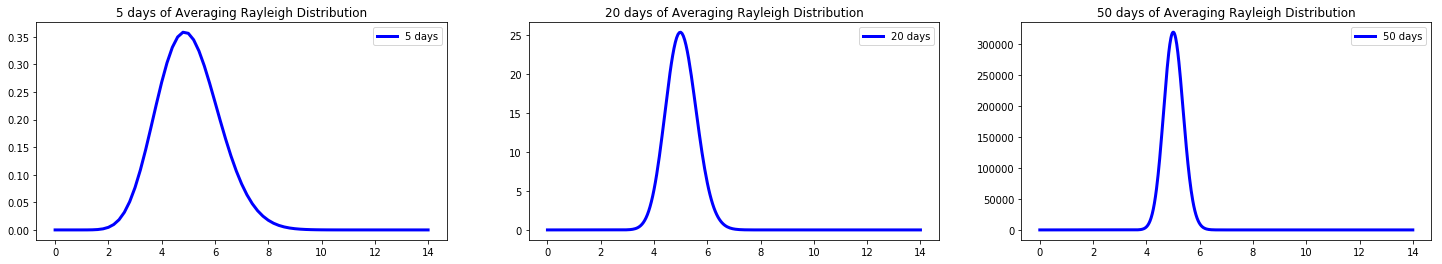

In [26]:
## Averaging Rayleigh distribution to determine if the graph looks like a normal distribution
fig, (ax, ax1, ax2) = plt.subplots(1, 3, figsize = (25,4))
x = np.linspace(0, 14, 15)

err_data = 1.4 * stats.rayleigh.pdf(x, loc=0, scale=4)

days = 5
days_1 = 20
days_2 = 50

y1 = np.convolve(err_data, err_data)
for i in range(2, days):
    y1 = np.convolve(y1, err_data)
    
ax.set_title('5 days of Averaging Rayleigh Distribution')
x_new = np.linspace(0, 14*days, 14*days+1)/days
ax.plot(x_new, y1, 'b', lw=3, label = f'{days} days')
#ax.plot(x, err_data, 'r', lw=3, label = 'Single day')
ax.legend()
ax.set_xlabel('Occurances')
ax.set_ylabel('Probability')

y2 = np.convolve(err_data, err_data)
for i in range(2, days_1):
    y2 = np.convolve(y2, err_data)
    
ax1.set_title('20 days of Averaging Rayleigh Distribution')
x_new = np.linspace(0, 14*days_1, 14*days_1+1)/days_1
ax1.plot(x_new, y2, 'b', lw=3, label = f'{days_1} days')
#ax1.plot(x, err_data, 'r', lw=3, label = 'Single day')
ax1.legend()
ax1.set_xlabel('Occurances')
ax1.set_ylabel('Probability')

y3 = np.convolve(err_data, err_data)
for i in range(2, days_2):
    y3 = np.convolve(y3, err_data)
    
ax2.set_title('50 days of Averaging Rayleigh Distribution')
x_new = np.linspace(0, 14*days_2, 14*days_2+1)/days_2
ax2.plot(x_new, y3, 'b', lw=3, label = f'{days_2} days')
#ax2.plot(x, err_data, 'r', lw=3, label = 'Single day')
ax2.legend()
ax2.set_xlabel('Occurances')
ax2.set_ylabel('Probability')


Text(0,0.5,'Log(Probability)')

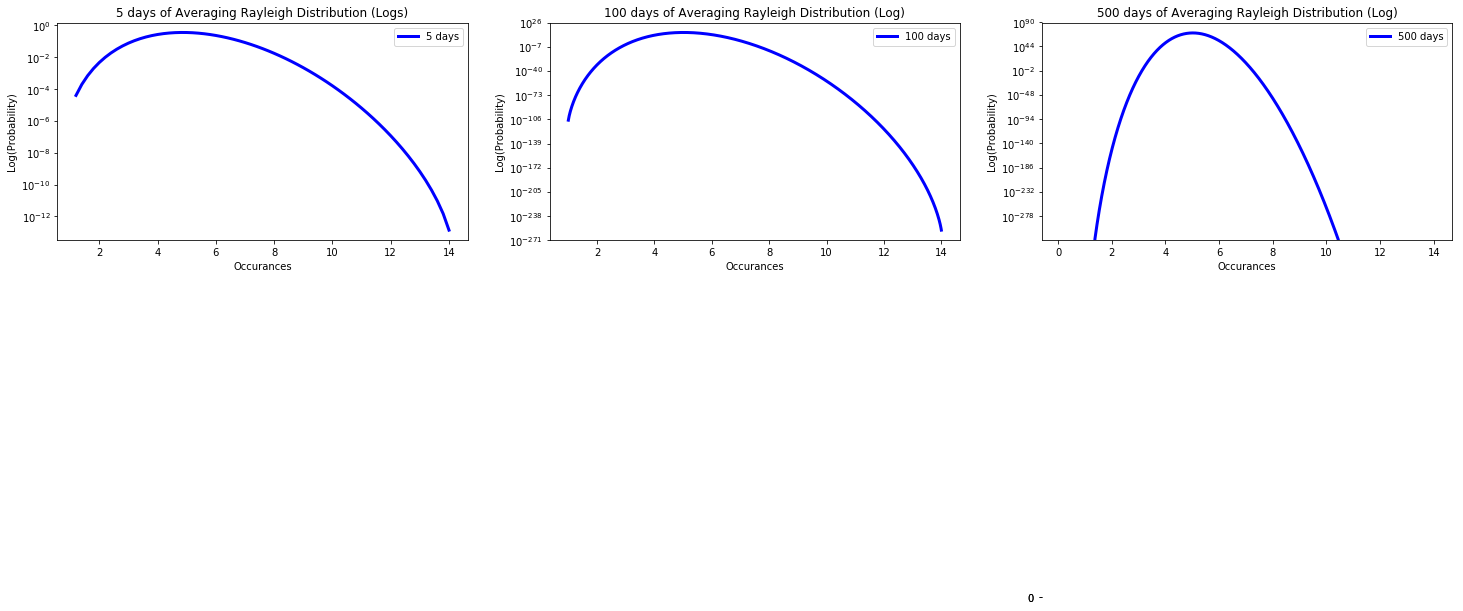

In [28]:
## I take the log to see if this distribution starts to result in a gaussian looking distribution
fig, (ax, ax1, ax2) = plt.subplots(1, 3, figsize = (25,4))
x = np.linspace(0, 14, 15)

err_data = 1.4 * stats.rayleigh.pdf(x, loc=0, scale=4)

days = 5
days_1 = 100
days_2 = 500

y1 = np.convolve(err_data, err_data)
for i in range(2, days):
    y1 = np.convolve(y1, err_data)
    
ax.set_title('5 days of Averaging Rayleigh Distribution (Logs)')
x_new = np.linspace(0, 14*days, 14*days+1)/days
ax.plot(x_new[6:], y1[6:], 'b', lw=3, label = f'{days} days')
#ax.plot(x, err_data, 'r', lw=3, label = 'Single day')
ax.legend()
ax.set_yscale('log')
ax.set_xlabel('Occurances')
ax.set_ylabel('Log(Probability)')

y2 = np.convolve(err_data, err_data)
for i in range(2, days_1):
    y2 = np.convolve(y2, err_data)
    
ax1.set_title('100 days of Averaging Rayleigh Distribution (Log)')
x_new = np.linspace(0, 14*days_1, 14*days_1+1)/days_1
ax1.plot(x_new[100:], y2[100:], 'b', lw=3, label = f'{days_1} days')
#ax1.plot(x, err_data, 'r', lw=3, label = 'Single day')
ax1.legend()
ax1.set_yscale('log')
ax1.set_xlabel('Occurances')
ax1.set_ylabel('Log(Probability)')

y3 = np.convolve(err_data, err_data)
for i in range(2, days_2):
    y3 = np.convolve(y3, err_data)
    
ax2.set_title('500 days of Averaging Rayleigh Distribution (Log)')
x_new = np.linspace(0, 14*days_2, 14*days_2+1)/days_2
ax2.plot(x_new[50:], y3[50:], 'b', lw=3, label = f'{days_2} days')
#ax2.plot(x, err_data, 'r', lw=3, label = 'Single day')
ax2.legend()
ax2.set_yscale('log')
ax2.set_xlabel('Occurances')
ax2.set_ylabel('Log(Probability)')

We can see that as we start to take more convolutions and average them together they start to look more and more gaussian. This is verified through averaging at most, 500 days, and seeing that the shape is becoming more gaussian. We could further explore 'How different is this graph to a Gaussian distribution' by checking where points on a gaussian distribution would lay in relation to this distribution here. 

I will try to conclude findings from a distribution of data. The background data has a width of 5 and the pixel I am referring to has a value of 13.9

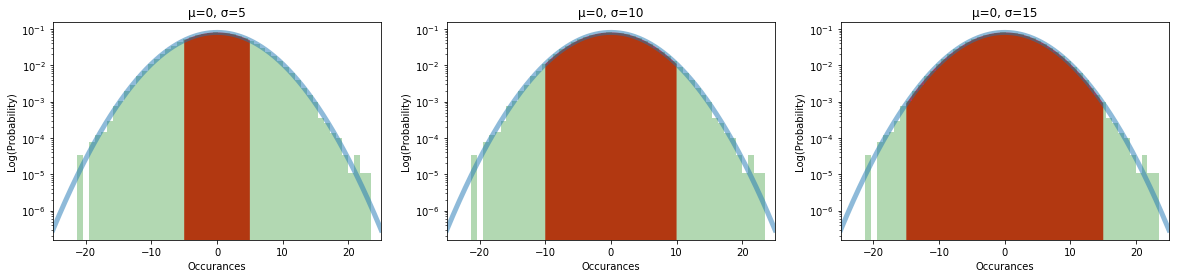

In [29]:
mu = 0; sigma = 5; siz=100000
distro = stats.norm.rvs(loc=mu, scale=sigma, size=siz )
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(20,4))

ax1.set_title(label=f"\u03bc={mu}, \u03C3={sigma}")
ax1.hist(distro,50, density=True, color='g', alpha=.3)
ax1.tick_params(labelsize = 10)
ax1.set_xlim([mu-5*sigma,mu+5*sigma])
ax1.set_yscale('log')
x = np.linspace(mu-5*sigma,mu+5*sigma,1000)
ax1.plot(x,stats.norm.pdf(x,loc = mu, scale = sigma),linewidth = 5,alpha = 0.5)
ax1.set_xlabel('Occurances')
ax1.set_ylabel('Log(Probability)')

ax2.set_title(label=f"\u03bc={mu}, \u03C3={sigma*2}")
ax2.hist(distro,50, density=True, color='g', alpha=.3)
ax2.tick_params(labelsize = 10)
ax2.set_xlim([mu-5*sigma,mu+5*sigma])
ax2.set_yscale('log')
x = np.linspace(mu-5*sigma,mu+5*sigma,1000)
ax2.plot(x,stats.norm.pdf(x,loc = mu, scale = sigma),linewidth = 5,alpha = 0.5)
ax2.set_xlabel('Occurances')
ax2.set_ylabel('Log(Probability)')

ax3.set_title(label=f"\u03bc={mu}, \u03C3={sigma*3}")
ax3.hist(distro,50, density=True, color='g', alpha=.3)
ax3.tick_params(labelsize = 10)
ax3.set_xlim([mu-5*sigma,mu+5*sigma])
ax3.set_yscale('log')
x = np.linspace(mu-5*sigma,mu+5*sigma,1000)
ax3.plot(x,stats.norm.pdf(x,loc = mu, scale = sigma),linewidth = 5,alpha = 0.5)
ax3.set_xlabel('Occurances')
ax3.set_ylabel('Log(Probability)')

fill_space1 = np.linspace(mu-1*sigma,mu+1*sigma,1000)
fill_space2 = np.linspace(mu-2*sigma,mu+2*sigma,1000)
fill_space3 = np.linspace(mu-3*sigma,mu+3*sigma,1000)

ax1.fill_between(fill_space1, stats.norm.pdf(fill_space1,loc = mu, scale = sigma), color = 'r', linewidth = 0, alpha = .9)
ax2.fill_between(fill_space2, stats.norm.pdf(fill_space2,loc = mu, scale = sigma), color = 'r', linewidth = 0, alpha = .9)
ax3.fill_between(fill_space3, stats.norm.pdf(fill_space3,loc = mu, scale = sigma), color = 'r', linewidth = 0, alpha = .9)

In [33]:
prob = 1 - stats.norm.cdf(13.9,mu, sigma)
z_val = stats.norm.ppf(1-(prob))

print(f'Percentage of occurances that appear as a signal: {prob:.8f}')
print(f'Sigma value associated with percentage: {z_val:.3f}')

Percentage of occurances that appear as a signal: 0.00271794
Sigma value associated with percentage: 2.780


I would have a hard time if I did not know which pixel to look at because I would have to search the entire 10k database to see if I detected anything. Therefore, when using the trials factor, I can mulitply the probability distribution by the number of pixels. 

Another way to interpret the same question would to ask, "If we assume we are looking at a dataset composed of 10k pixels, what is the probability that in any of the pixels from the background distribution do we find a value of 13.9?"

Expectation value: 27.17944923


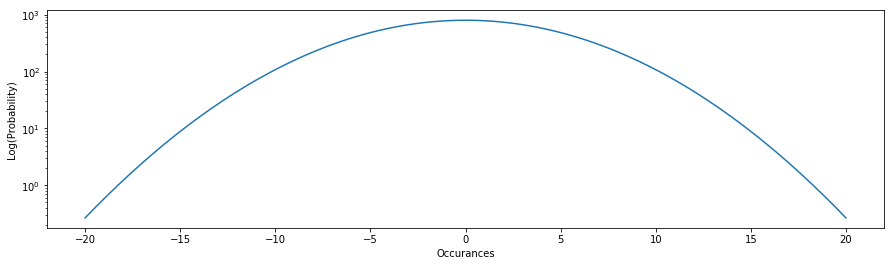

In [30]:
mu = 0; sigma = 5; pixels = 10000
x = np.linspace(-20,20, 200)
err_data = stats.norm.pdf(x, mu, sigma) * pixels

fig, ax1 = plt.subplots(1, 1, figsize=(15,4))

ax1.tick_params(labelsize = 10)
ax1.set_xlim([-22,22])
ax1.set_yscale('log')
ax1.plot(x,err_data)
ax1.set_xlabel('Occurances')
ax1.set_ylabel('Log(Probability)')

exp_val = (1 - stats.norm.cdf(13.9,mu, sigma))*pixels
z_val = stats.norm.ppf(1-(prob))

print(f'Expectation value: {exp_val:.8f}')

I will compare the difference between 10k pixels vs a single pixel detection for a 5$\sigma$ value. This should yield what a significant signal strength should look like when comparing the difference. My method will include finding the 5$\sigma$ value for a single pixel, then for 10k pixels. The ratio between the two will produce a sensitivity penality given this situation

In [41]:
prob_5_sig = 1/(3.5e6)
one_pix = stats.norm.ppf(1-prob_5_sig, mu, sigma)

tenk_pix = stats.norm.ppf(1-prob_5_sig/pixels, mu, sigma)
prob_10k_pix = (1 - stats.norm.cdf(tenk_pix, mu, sigma))*pixels

fivek_pix = stats.norm.ppf(1-prob_5_sig/5000, mu, sigma)
prob_5k_pix = (1 - stats.norm.cdf(tenk_pix, mu, sigma))*5000

z_val = stats.norm.ppf(1-(prob_10k_pix))

ratio_10k_to_1 = tenk_pix / one_pix
ratio_5k_to_1 = fivek_pix / one_pix
ratio_10k_to_5k = tenk_pix / fivek_pix

print(f'Percentage of occurances that appear as a signal: {prob_10k_pix:.10f}')
print(f'Sigma value associated with percentage: {z_val:.3f}')
print()
print(f'Sensitivity penalty for distribution of 10k / 1 pixel: {ratio_10k_to_1:7f}')
print(f'Sensitivity penalty for distribution of 5k / 1 pixel: {ratio_5k_to_1:7f}')
print(f'Sensitivity penalty for distribution of 10k / 5k pixels: {ratio_10k_to_5k:7f}')

Percentage of occurances that appear as a signal: 0.0000002857
Sigma value associated with percentage: 5.001

Sensitivity penalty for distribution of 10k / 1 pixel: 1.310040
Sensitivity penalty for distribution of 5k / 1 pixel: 1.289184
Sensitivity penalty for distribution of 10k / 5k pixels: 1.016177


The sensitivity penalty (ratio), isn't as high as I thought. After doing more of a deep dive, this does not surprise me because if you look at the distributions, the two tails of the graphs are fairly the same. Even when multiplying by the 10k pixels, the difference in the scale to reach the same probability when applying the cdf function does not change significantly. This is true even from a single pixel distribution. 

Text(0,0.5,'Ratio between multiple pixels vs one pixel')

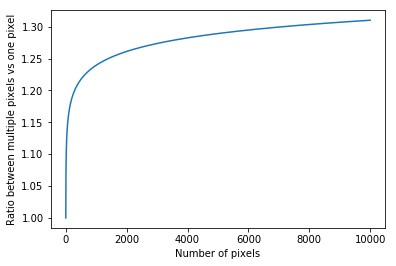

In [32]:
x = []
data = []

prob_5_sig = 1/(3.5e6)
one_pix = stats.norm.ppf(1-prob_5_sig, mu, sigma)
for i in range(1, 10000):
    x.append(i)
    tenk_pix = stats.norm.ppf(1-prob_5_sig/i, mu, sigma)
    data.append(tenk_pix / one_pix)
plt.plot(x, data)
plt.xlabel('Number of pixels')
plt.ylabel('Ratio between multiple pixels vs one pixel')
    

From here, we can see that we only really need ~ 2000 pixels to be able to produce a fairly close sensitivity to what we get at around the 10k pixel level